In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from vnstock import Quote


symbol = 'FPT'
start_date = '2023-01-01'
end_date = '2026-01-13'


quote = Quote(symbol=symbol, source='VCI')

df = quote.history(start=start_date, end=end_date, interval='1D')

In [5]:
df.tail()

,time,open,high,low,close,volume
789,2026-01-07,94.1,97.6,94.0,97.5,11427400
790,2026-01-08,98.1,98.1,96.5,96.5,5576200
791,2026-01-09,96.1,99.9,96.0,97.4,10048700
792,2026-01-12,98.0,99.5,98.0,99.5,9076600
793,2026-01-13,99.7,101.7,97.9,98.9,9411100


In [8]:
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')

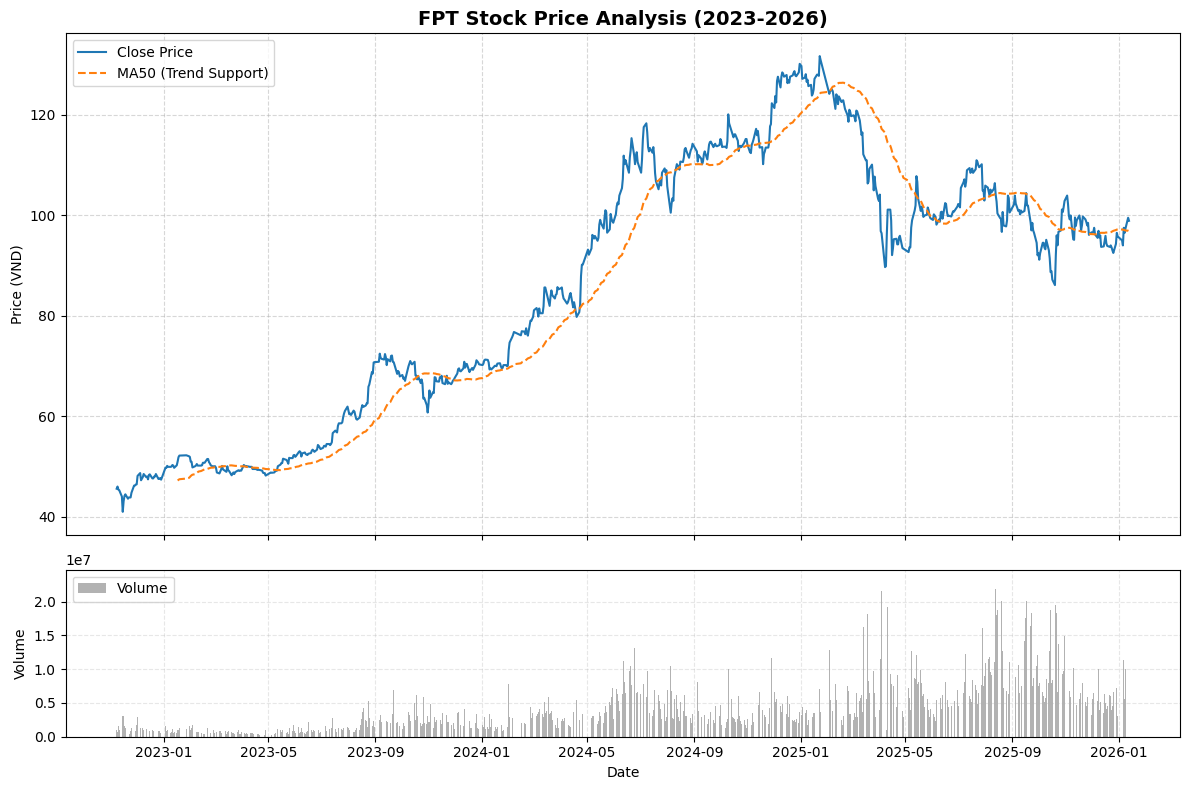

In [9]:
df['MA50'] = df['close'].rolling(window=50).mean()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, 
                               gridspec_kw={'height_ratios': [3, 1]})

# --- Top Chart: Price & MA ---
ax1.set_title('FPT Stock Price Analysis (2023-2026)', fontsize=14, fontweight='bold')
ax1.plot(df.index, df['close'], label='Close Price', color='#1f77b4', linewidth=1.5)
ax1.plot(df.index, df['MA50'], label='MA50 (Trend Support)', color='#ff7f0e', linestyle='--', linewidth=1.5)
ax1.set_ylabel('Price (VND)')
ax1.legend(loc='upper left')
ax1.grid(True, which='both', linestyle='--', alpha=0.5)

# --- Bottom Chart: Volume ---
ax2.bar(df.index, df['volume'], label='Volume', color='gray', alpha=0.6)
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.legend(loc='upper left')
ax2.grid(True, which='both', linestyle='--', alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

# Train a naive Linear Regression model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = df[['close']].copy()
df['Prediction'] = df['close'].shift(-1)

data = df.dropna()

In [13]:
X = np.array(data['close']).reshape(-1, 1)
y = np.array(data['Prediction'])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [15]:
model = LinearRegression()
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [18]:
predictions = model.predict(x_test)
r2 = r2_score(y_test, predictions)

r2


0.8787147629415404

In [19]:
last_known_price = np.array([[df['close'].iloc[-1]]])
future_price = model.predict(last_known_price)

In [20]:
future_price

array([98.94476286])

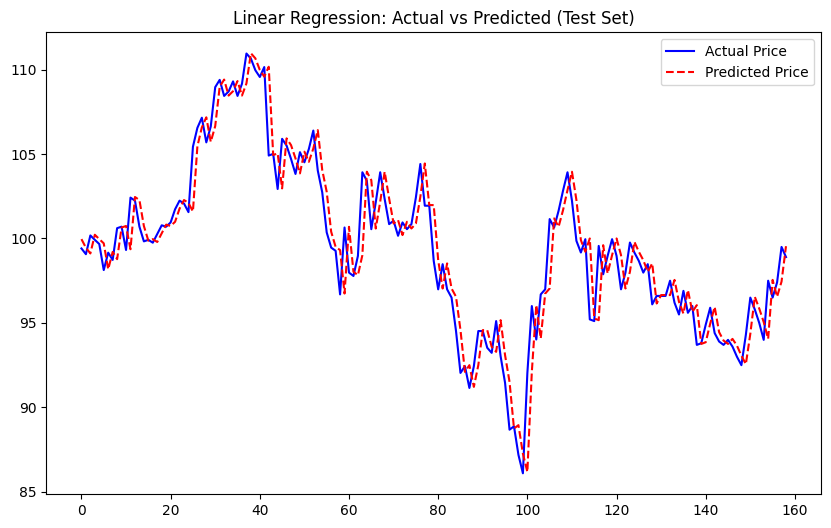

In [21]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual Price', color='blue')
plt.plot(predictions, label='Predicted Price', color='red', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted (Test Set)')
plt.legend()
plt.show()

Nothing to be noted here, the model is using the past data to predict the next